## Serena and Kat Visualization Support 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [77]:
l = pd.read_csv(r'/Users/natalie_kraft/Documents/LAS/PewData/Pew2019.csv')

d20 = pd.read_csv(r'/Users/natalie_kraft/Documents/LAS/PewData/Pew2020.csv')

d16 = pd.read_csv(r'/Users/natalie_kraft/Documents/LAS/PewData/Pew2016.csv')
d15 = pd.read_csv(r'/Users/natalie_kraft/Documents/LAS/PewData/Pew2015.csv')

/Users/natalie_kraft/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9,16,17,18,19,20,25,26,27,28,49,50,51,52,56,57,133,134,135,154,155,156,157,164,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,189,190,191,192,193,194,199,200,201,202,203,210,211,212,213,215,217,218,219,221,243,244,245,250,260,261,262,263,264,273,288,289,294,296,302,304,327,331,334,335,336,337,338,339,340,341,342,345,348,352,359,361,382,386,387,389,395,397,416,423,458,467,468,475,478,479,481,487,489,506,510,511,515,521,522,523,524,525,527,528,529,540,541,542,546,547,548,594,595,596,604,605,606) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/natalie_kraft/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20,21,188) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raise

## 2020 

In [3]:
# 7 for 2020 = Italy, 12 for Sweden, 14 for US
responseFlip = {
    1:4, 
    2:3, 
    3:2, 
    4:1
}

d20['fav_US'] = d20['fav_US'].map(responseFlip)
d20['fav_China'] = d20['fav_China'].map(responseFlip)
d20['fav_Russia'] = d20['fav_Russia'].map(responseFlip)

d20All = d20
d20 = d20.loc[(d20['country'] == 7) | (d20['country'] == 12) | (d20['country'] == 14)]

countrymap = {
    7:'Italy', 
    12:'Sweden', 
    14:'US'
}

d20['country'] = d20['country'].map(countrymap)

<ipython-input-3-e35be5ad5041>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d20['country'] = d20['country'].map(countrymap)


In [4]:
d20.groupby('country')[['fav_US', 'fav_China', 'fav_Russia']].agg(['mean'])

,fav_US,fav_China,fav_Russia
,mean,mean,mean
country,,,
Italy,2.235887,2.153924,2.303462
Sweden,2.207035,1.772407,1.814257
US,3.167004,1.770921,1.747562


In [5]:
1 - (d20['fav_China'].mean() / d16['fav_China'].mean())

KeyError: 'fav_China'

In [6]:
print("The 2020 World Average for China Favorability is " + str(d20All['fav_China'].mean()))
print("The 2020 World Average for US Favorability is " + str(d20All['fav_US'].mean()))

The 2020 World Average for China Favorability is 1.914069809283915
The 2020 World Average for US Favorability is 2.2668669957787793


In [7]:
d20.groupby('country').count()

,ID,survey,phone_sample,weight,covid_change,covid_ownfaith,covid_countryfaith,covid_family,covid_united,covid_cooperation,...,REGION_NETHERLANDS,REGION_Spain,REGION_SWEDEN,region_uk,QS8,cregion_us,state_us,density_us,QDATE_S,QDATE_E
country,,,,,,,,,,,,,,,,,,,,,
Italy,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002,...,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
Sweden,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016
US,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003


Text(0.5, 1.0, 'Italian perception of China')

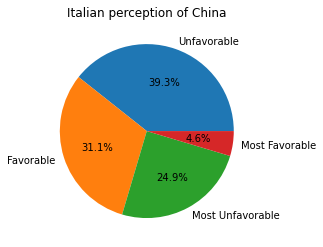

In [8]:
p = d20[(d20['fav_China']  < 6) & (d20['country'] == 'Italy')]['fav_China'].value_counts()

plt.pie(p, labels = ['Unfavorable', 'Favorable', 'Most Unfavorable', 'Most Favorable'], autopct='%1.1f%%')
plt.title("Italian perception of China")

Text(0.5, 1.0, 'Swedish perception of China')

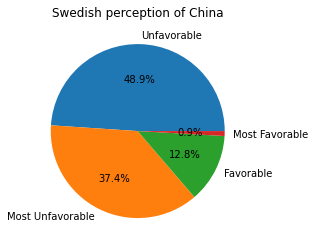

In [9]:
p = d20[(d20['fav_China']  < 6) & (d20['country'] == 'Sweden')]['fav_China'].value_counts()

plt.pie(p, labels = ['Unfavorable', 'Most Unfavorable', 'Favorable', 'Most Favorable'], autopct='%1.1f%%')
plt.title("Swedish perception of China")

In [10]:
p

2.0    486
1.0    371
3.0    127
4.0      9
Name: fav_China, dtype: int64

## 2016 

In [11]:
# 9 for 2020 = Italy, 17 for Sweden, 19 for US

responseFlip = {
    1:4, 
    2:3, 
    3:2, 
    4:1
}

d16['fav_US'] = d16['Q10A'].map(responseFlip)
d16['fav_China'] = d16['Q10B'].map(responseFlip)

d16All = d16
d16 = d16.loc[(d16['country'] == 9) | (d16['country'] == 17) | (d16['country'] == 19)]

countrymap = {
    9:'Italy', 
    17:'Sweden', 
    19:'US'
}

d16['country'] = d16['country'].map(countrymap)


<ipython-input-11-5f5e32d39141>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d16['country'] = d16['country'].map(countrymap)


In [12]:
d16.groupby('country')[['fav_US', 'fav_China']].agg(['mean'])

,fav_US,fav_China
,mean,mean
country,,
Italy,2.825820,2.086498
Sweden,2.850410,2.283195
US,3.329918,2.225983


In [13]:
print("The 2016 World Average for China Favorability is " + str(d16All['fav_China'].mean()))
print("The 2016 World Average for US Favorability is " + str(d16All['fav_US'].mean()))

The 2016 World Average for China Favorability is 2.5668318022221155
The 2016 World Average for US Favorability is 2.8158709314323236


Text(0.5, 1.0, 'Swedish perception of China')

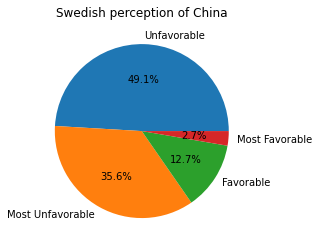

In [14]:
p = d16[(d16['fav_China']  < 6) & (d16['country'] == 'Sweden')]['fav_China'].value_counts()

plt.pie(p, labels = ['Unfavorable', 'Most Unfavorable', 'Favorable', 'Most Favorable'], autopct='%1.1f%%')
plt.title("Swedish perception of China")

Text(0.5, 1.0, 'Italy perception of China')

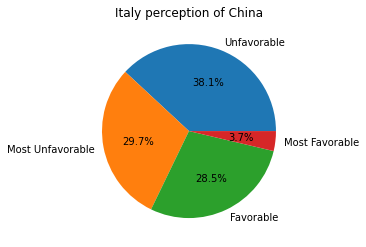

In [15]:
p = d16[(d16['fav_China']  < 6) & (d16['country'] == 'Italy')]['fav_China'].value_counts()

plt.pie(p, labels = ['Unfavorable', 'Most Unfavorable', 'Favorable', 'Most Favorable'], autopct='%1.1f%%')
plt.title("Italy perception of China")

In [16]:
p

2.0    361
3.0    282
1.0    270
4.0     35
Name: fav_China, dtype: int64

## 2015

In [17]:


# 15 for 2015 = Italy, sweden not available, 20 for Malaysia 
# d15 = d15.loc[(d15['COUNTRY'] == 20)]

In [25]:
d15.groupby('COUNTRY')[['Q12A', 'Q12B', 'Q12C', 'Q12D']].mean()

,Q12A,Q12B,Q12C,Q12D
COUNTRY,,,,
1,3.387000,3.527000,4.663000,4.629000
2,2.690239,2.854582,3.854582,3.612550
3,2.408000,2.869000,3.771000,3.661000
4,2.482000,2.633000,4.880000,4.649000
5,2.503000,2.702000,4.000000,3.719000
6,2.868457,1.431625,3.652782,2.981639
7,2.485060,3.281873,3.981076,3.638446
8,2.235000,2.734000,5.413000,5.115000
9,2.263736,2.581419,3.264735,2.969031


In [78]:
mal = d15[d15['COUNTRY'] == 20]
mal['Q12A'].value_counts()

2    413
3    265
4    159
1    120
8     35
9      8
Name: Q12A, dtype: int64

In [79]:
it = d15[d15['COUNTRY'] == 15]
it['Q12A'].value_counts()

2    579
1    256
3    120
4     27
8     16
9      2
Name: Q12A, dtype: int64

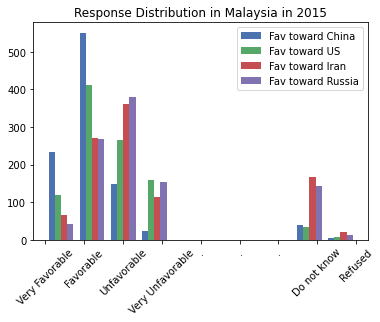

In [88]:
plt.style.use('seaborn-deep')

plt.title('Response Distribution in Malaysia in 2015')
plt.xticks(np.arange(10), ['.', 'Very Favorable', 'Favorable', 'Unfavorable', 'Very Unfavorable', '.', 
                     '.', '.', 'Do not know', 'Refused'], rotation=45)
plt.hist([mal['Q12B'], mal['Q12A'], mal['Q12C'], mal['Q12D']], bins=10, label=['Fav toward China', 'Fav toward US', 'Fav toward Iran', 'Fav toward Russia'])
plt.legend(loc='upper right')
plt.show()


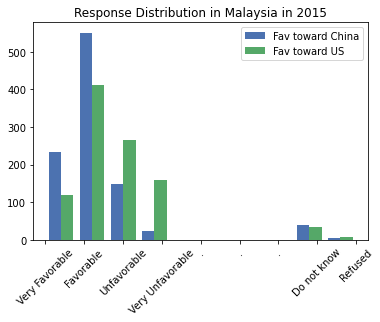

In [89]:
plt.style.use('seaborn-deep')

plt.title('Response Distribution in Malaysia in 2015')
plt.xticks(np.arange(10), ['.', 'Very Favorable', 'Favorable', 'Unfavorable', 'Very Unfavorable', '.', 
                     '.', '.', 'Do not know', 'Refused'], rotation=45)
plt.hist([mal['Q12B'], mal['Q12A']], bins=10, label=['Fav toward China', 'Fav toward US'])
plt.legend(loc='upper right')
plt.show()

In [70]:
drop = {
    1:4, 
    2:3, 
    3:2, 
    4:1
}

mal['Q12A'] = mal['Q12A'].map(drop)
mal['Q12B'] = mal['Q12B'].map(drop)
mal['Q12C'] = mal['Q12C'].map(drop)
mal['Q12D'] = mal['Q12D'].map(drop)

d15['Q12A'] = d15['Q12A'].map(drop)
d15['Q12B'] = d15['Q12B'].map(drop)
d15['Q12C'] = d15['Q12C'].map(drop)
d15['Q12D'] = d15['Q12D'].map(drop)


print('Malaysia is ' + str((mal['Q12A'].mean() * 100 / d15['Q12A'].mean()) - 100) + " % from the world opinion of the US.")
print("Malaysia is " + str(mal['Q12A'].mean()) + " / " + str(d15['Q12A'].mean()) + " on US")
print('Malaysia is ' + str((mal['Q12B'].mean() * 100 / d15['Q12B'].mean()) - 100) + " % from the world opinion of China.")
print("Malaysia is " + str(mal['Q12B'].mean()) + " / " + str(d15['Q12B'].mean()) +  " on China")
print('Malaysia is ' + str((mal['Q12C'].mean() * 100 / d15['Q12C'].mean()) - 100) + " % from the world opinion of Iran.")
print("Malaysia is " + str(mal['Q12C'].mean()) + " / " + str(d15['Q12C'].mean()) +  " on Iran")
print('Malaysia is ' + str((mal['Q12D'].mean() * 100 / d15['Q12D'].mean()) - 100) + " % from the world opinion of Russia.")
print("Malaysia is " + str(mal['Q12D'].mean()) + " / " + str(d15['Q12D'].mean()) + " on Russia")

Malaysia is -11.213479551768657 % from the world opinion of the US.
Malaysia is 2.51619644723093 / 2.8339847473784556 on US
Malaysia is 10.001089595545764 % from the world opinion of China.
Malaysia is 3.0418848167539267 / 2.7653224417488866 on China
Malaysia is 14.461859527780419 % from the world opinion of Iran.
Malaysia is 2.35995085995086 / 2.0617792421746293 on Iran
Malaysia is -2.6366922718086414 % from the world opinion of Russia.
Malaysia is 2.2322274881516586 / 2.2926783613220665 on Russia


<ipython-input-70-ebfeed02b49a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal['Q12A'] = mal['Q12A'].map(drop)
<ipython-input-70-ebfeed02b49a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal['Q12B'] = mal['Q12B'].map(drop)
<ipython-input-70-ebfeed02b49a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [72]:
mal['favor China'] = mal['Q12B'] - mal['Q12A']
mal['favor China'].value_counts()

<ipython-input-72-7699cbb94abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal['favor China'] = mal['Q12B'] - mal['Q12A']


 0.0    352
 1.0    341
 2.0    121
-1.0     96
-2.0     15
 3.0     11
-3.0      1
Name: favor China, dtype: int64

In [73]:
473 / mal['favor China'].value_counts().sum() 

0.5048025613660619

In [74]:
112 / mal['favor China'].value_counts().sum() 

0.11953041622198506